# Maaş Verisi Analizi Projesi



****Bu projede, çalışan maaşları, iş unvanları ve faydalar gibi bilgileri analiz ederek değerli analizler yapmayı amaçlıyoruz. Veri seti, temizlik, keşifsel veri analizi (EDA), görselleştirmeler ve özellik mühendisliği adımlarıyla işlenmiştir.
Projede, maaş dağılımları, yıllara göre ortalamalar, en yüksek maaş alan iş unvanları gibi detaylar incelenmiştir. Ayrıca, veri setindeki ilişkiler korelasyon matrisleri ve scatter plotlar ile görselleştirilmiştir.
Projeyi inceleyerek veri analizi sürecine dair pratik bilgiler edinebilirsiniz.****

# Gerekli Kütüphanelerin ve Veri Setinin Yüklenmesi

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing işlemleri için
import random

salary = pd.read_csv('../input/sf-salaries/Salaries.csv') # Veri setini yükleme

/tmp/ipykernel_30/3474127952.py:5: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salary = pd.read_csv('../input/sf-salaries/Salaries.csv') # Veri setini yükleme


In [44]:
def add_random_missing_values(missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in the salary DataFrame.

    Args:
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05.

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object with random NaN values.
    """
    # Get copy of salary dataframe
    df_missing = salary.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = salary.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, salary.shape[0] - 1)
        col_idx = random.randint(0, salary.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


****Bu kod sayesinde daha sonra veriyi analiz etmek için üzerinde oynayacağımız NaN değerler yaratıyoruz.****

# Keşifsel Veri Analizi (EDA)

****Keşifsel veri analizi (EDA), veri setini anlamak ve temel özelliklerini keşfetmek için uygulanan bir adımdır.Bu adımda sırasıyla Veri Seti Yapısının İncelenmesi ve Temel İstatistiksel Analizler yapacağız.**** 

In [45]:
salary.info() # Veri seti yapısı hakkında bilgiler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [46]:
# Veriyi tanıma
print(salary.info()) #Yukardaki bazı değerlere NaN atamasından sonra tekrardan veri tiplerini kontrol etme
print(salary.describe())#salary veri setindeki sayısal sütunlar için temel istatistiksel bilgileri döndürme

# Eksik verilerin yüzdesini hesaplama
missing_data = salary.isnull().mean() * 100
print(missing_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB
None
                  Id       TotalPay  TotalPayBenefits           Year  Notes
count  148654.000000  148

****Görüldüğü üzere veri setimizde NaN veriler ve 0 veriler bulunmakta. Birazdan bunlar üstünde analizimizi kolaylaştıracak işlemler yapacağımız****

****Verimizde ilk 10 kişinin bilgilerini ve son 10 kişinin bilgilerine bakalım.****

In [50]:
salary.head(10) # İlk 10 veriyi gösterme 

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [51]:
salary.tail(10)# Sondan 10 veriyi gösterme

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148644,148645,Randy D Winn,"Stationary Eng, Sewage Plant",0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [52]:
salary.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109900
OvertimePay          66555
OtherPay             84968
Benefits             99635
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

****Bu kod sayesinde veri setindeki her bir sütun için benzersiz (unique) değerlerin sayısını döndürür. 
Bu bilgiler sayesinde bütün sütunların kaçar adet veriden oluştuğu bilgisine erişiyoruz****

# Veri Ön İşleme Adımları

****Veri ön işleme, analiz veya modelleme adımlarından önce ham veriyi temizlemek ve düzenlemek için önemli bir süreçtir.
Sırasıyla aşağıdaki işlemleri gerçekleştireceğiz
1-Eksik Verilerin Tespiti ve İşlenmesi
2-Anormal Değerlerin Düzeltilmesi****
    

In [53]:
# Sayısal verilere dönüştürme
numeric_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for col in numeric_columns:
    salary[col] = pd.to_numeric(salary[col], errors='coerce')


****Object türündeki değişkenleri nümerik değerlere dönüştürmek, veriyi analiz edilebilir, görselleştirilebilir hale getirir. Bu işlem, doğru analiz ve modelleme için temel bir adımdır.****

In [54]:
salary['BasePay'] = salary['BasePay'].fillna(salary['BasePay'].median())


****Basepay sütunundaki eksik değerleri yine aynı sütunun ortalama değeriyle dolduruldu. Bu şekilde bu veriler herhangi bir yanlış analize yol açmayacak.****

In [55]:
# Negatif değerleri sıfır yapma
salary.loc[salary['BasePay'] < 0, 'BasePay'] = 0
salary.loc[salary['OvertimePay'] < 0, 'OvertimePay'] = 0
salary.loc[salary['OtherPay'] < 0, 'OtherPay'] = 0
salary.loc[salary['Benefits'] < 0, 'Benefits'] = 0



****Bu kod, maaş ve ödeme gibi finansal sütunlarda negatif değerleri temizleyerek, veri setinin güvenilirliğini artırmayı amaçlar. Bu sayede analiz yapılırken doğacak hataları minimum'a indirilmek amaçlanır.****

In [56]:
print(salary.info())
print(salary.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(7), int64(2), object(4)
memory usage: 14.7+ MB
None
Id                       0
EmployeeName             0
JobTitle                 0
BasePay             

In [57]:
salary['OvertimePay'] = salary['OvertimePay'].fillna(salary['OvertimePay'].median())
salary['OtherPay'] = salary['OtherPay'].fillna(salary['OtherPay'].median())


****'OvertimePay' ve 'OtherPay' sütunundaki eksik değerleri yine aynı sütunun ortalama değeriyle dolduruldu. Bu şekilde bu veriler herhangi bir yanlış analize yol açmayacak.****

In [59]:
salary['Benefits'] = salary['Benefits'].fillna(0)
salary['Status'] = salary['Status'].fillna('Unknown')
salary = salary.drop(columns=['Status'])
salary = salary.drop(columns=['Notes'])


In [60]:
print(salary.info())
print(salary.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB
None
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0

****Kontrol ettiğimizde sütunlardaki null değer kalmamış görünüyor. Doğru yolda ilerliyoruz. Devam edelim.****

****Şimdi biraz da veri setimizin mod, medyan gibi istatistiksel parametrelerine bakalım****

In [61]:
#Toplam maaşların ortalaması
salary['TotalPay'].mean()

74768.32197169267

In [62]:
salary['TotalPay'].std() # TotalPay sütununun standart sapması yaklaşık olarak 50.000 dolar olduğunu görüyoruz.


50517.00527394987

In [63]:
salary['TotalPay'].max() # En yüksek yıllık maaş 

567595.43

In [64]:
salary[salary['EmployeeName']=='ALBERT PARDINI']['TotalPayBenefits'] #"ALBERT PARDINI" çalışanına ait toplam maaş ve TotalPayBenefits bilgisi gösterilir.

2    335279.91
Name: TotalPayBenefits, dtype: float64

In [65]:
salary['JobTitle'].nunique() #Birbirinden farklı iş ünvanı sayısı

2159

In [66]:
salary['JobTitle'].value_counts().head(5) # En yüksek frekanslı iş ünvanları

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64

In [67]:
average_salary_per_job = salary.groupby('JobTitle')['TotalPay'].mean().reset_index()
average_salary_per_job.rename(columns={'TotalPay': 'AverageSalary'}, inplace=True)

# Ortalama maaşa göre sıralama ve ilk 10 iş türünü seçme
top_10_jobs = average_salary_per_job.sort_values(by='AverageSalary', ascending=False).head(10)

print(top_10_jobs)


                                           JobTitle  AverageSalary
831  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  399211.275000
466                        Chief Investment Officer  339653.700000
474                                 Chief of Police  329183.646667
475                          Chief, Fire Department  325971.683333
586                  DEPUTY DIRECTOR OF INVESTMENTS  307899.460000
324          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)  302377.730000
838                      Gen Mgr, Public Trnsp Dept  297769.413333
206                    Asst Chf of Dept (Fire Dept)  281763.483889
576    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  279359.560000
621                    Dep Dir for Investments, Ret  278592.545000


# Veri Seti Görselleştirme ve Frekans Analizleri


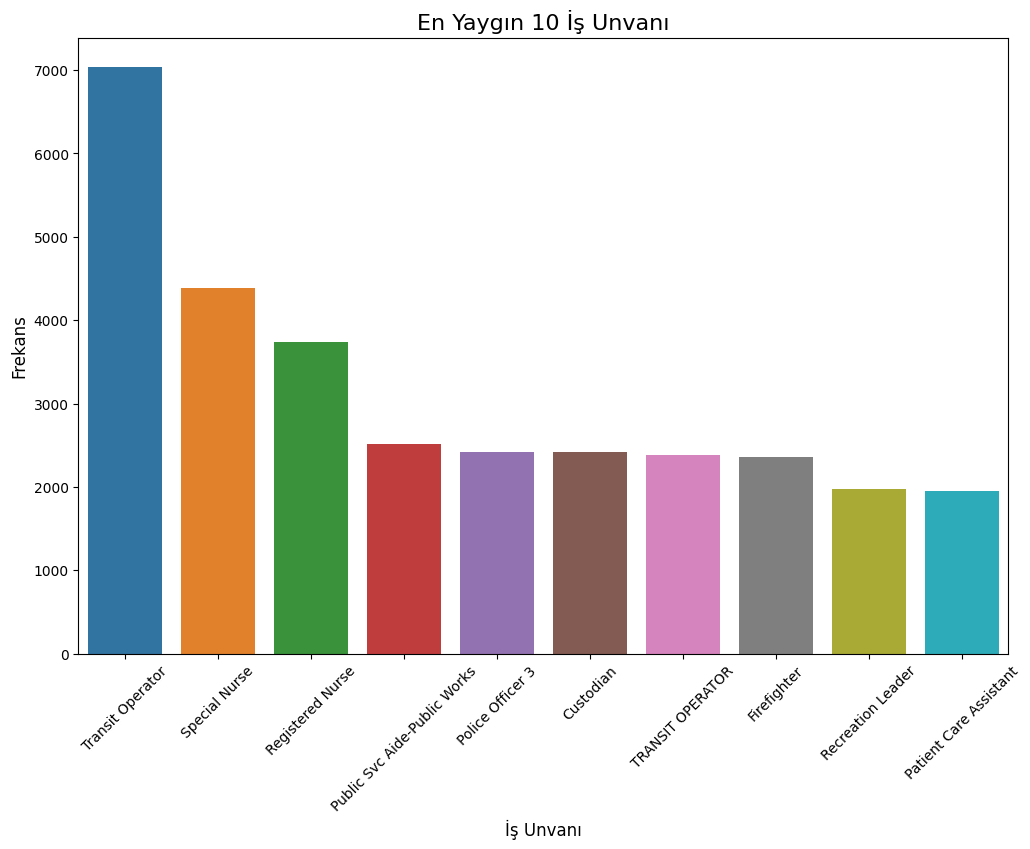

In [68]:
# JobTitle için frekans grafiği
plt.figure(figsize=(12, 8)) # Grafik boyutu
sns.countplot(data=salary, x='JobTitle', order=salary['JobTitle'].value_counts().index[:10]) # En yüksek frekanslı 10 iş ünvanını seçme
plt.title('En Yaygın 10 İş Unvanı', fontsize=16) # Ana başlık
plt.xlabel('İş Unvanı', fontsize=12) # x ekseni başlığı
plt.ylabel('Frekans', fontsize=12) # y ekseni başlığı 
plt.xticks(rotation=45) # x eksenindeki başlıkları 45 derece döndürülmesini sağlar.
plt.show()


****Salary veri setindeki en yaygın 10 iş unvanının frekansını yukarıdaki grafikten görebiliriz.****

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


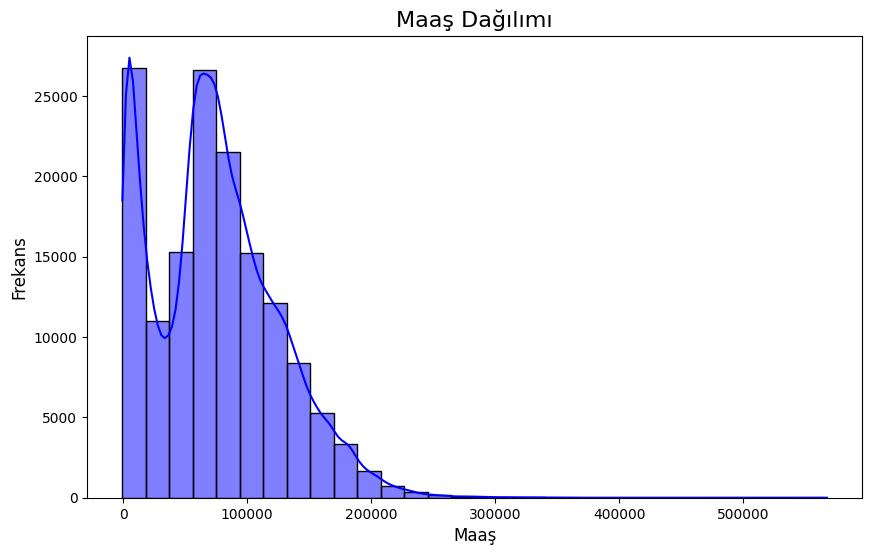

In [69]:
#Görselleştirmeler için gerekli kütüphanelerin yüklenmesi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=salary, x='TotalPay', bins=30, kde=True, color='blue')
plt.title('Maaş Dağılımı', fontsize=16)
plt.xlabel('Maaş', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.show()


****Bu grafiği inceleyerek ise maaş dağılımı ile frekansları arasındaki ilişkiyi görebiliriz. Grafiğimiz yaklaşık olarak yıllık 20.000 ile 60.000 dolar arasında U tipi;60.000 dolardan sonra ters ise Ters J tipi bir grafik çizmiş.****

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


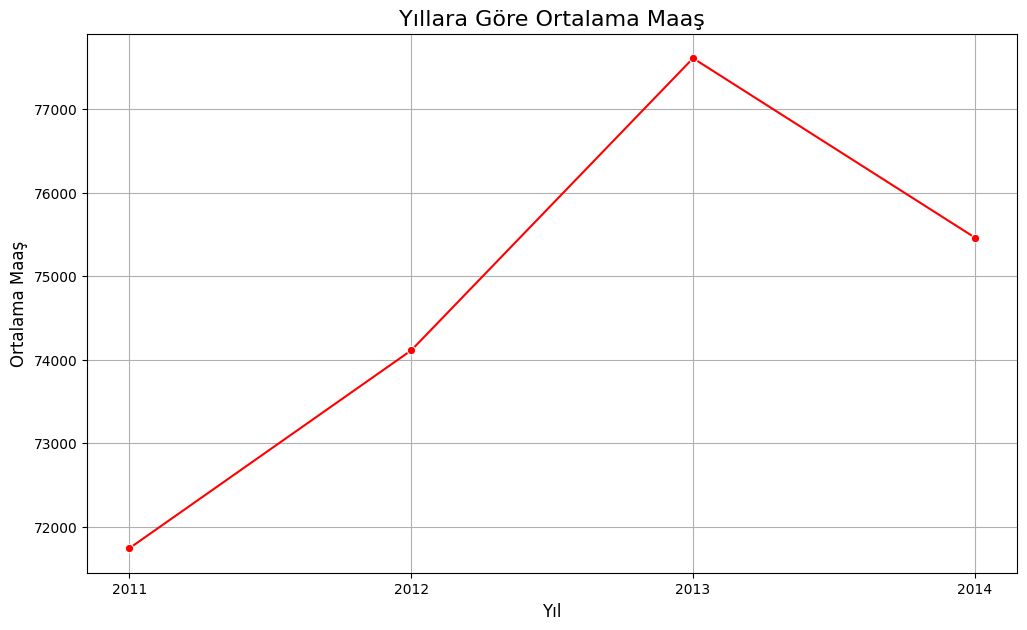

In [70]:
plt.figure(figsize=(12, 7))
yearly_avg_salary = salary.groupby('Year')['TotalPay'].mean().reset_index() # Yıllara göre ortalama en yüksek maaşlar

sns.lineplot(data=yearly_avg_salary, x='Year', y='TotalPay', marker='o', color='red') #Görselleştirmeyi hangi değişkenler üzerinde yapılacağını seçme 
plt.title('Yıllara Göre Ortalama Maaş', fontsize=16) #Başlık
plt.xlabel('Yıl', fontsize=12) 
plt.ylabel('Ortalama Maaş', fontsize=12)
plt.xticks(yearly_avg_salary['Year'])  # Yılları net görmek için
plt.grid(True) #Izgara çizgileri
plt.show()


****Yıllara göre ortalama maaş analizini yukarıdaki grafikten görebiliriz.2013 yılından sonra bir düşüş mevcut.****

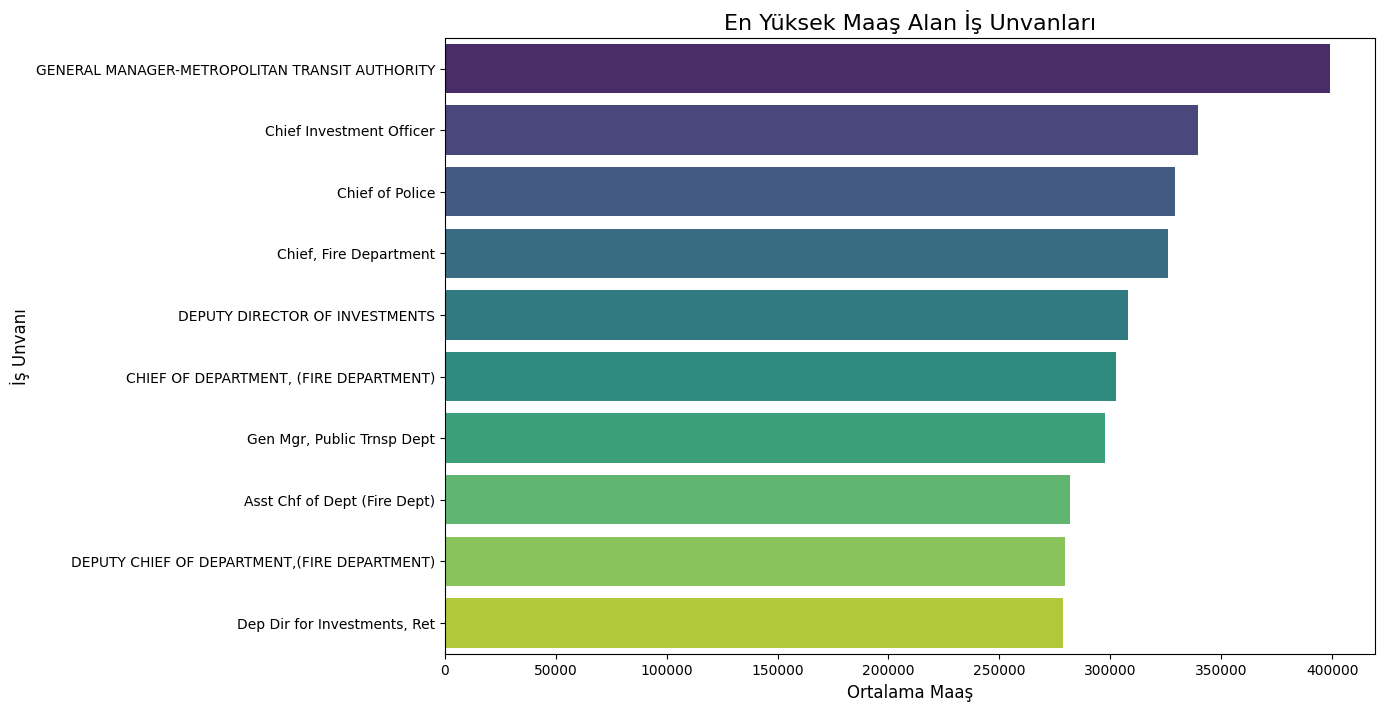

In [71]:
plt.figure(figsize=(12, 8)) #Figür boyutu
top_jobs = salary.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False).head(10).reset_index() #İş ünvanına göre en yüksek maaş alan ilk 10 meslek

sns.barplot(data=top_jobs, x='TotalPay', y='JobTitle', palette='viridis') #x ve y sütun değişkenlerini seçme
plt.title('En Yüksek Maaş Alan İş Unvanları', fontsize=16) # Ana başlık
plt.xlabel('Ortalama Maaş', fontsize=12)
plt.ylabel('İş Unvanı', fontsize=12)
plt.show() # Grafiği gösterme


****Bu kod, salary veri setinde yer alan iş unvanlarına göre ortalama maaşları hesaplayarak, en yüksek maaş alan ilk 10 iş unvanını barplot (çubuk grafik) ile görselleştirir.****

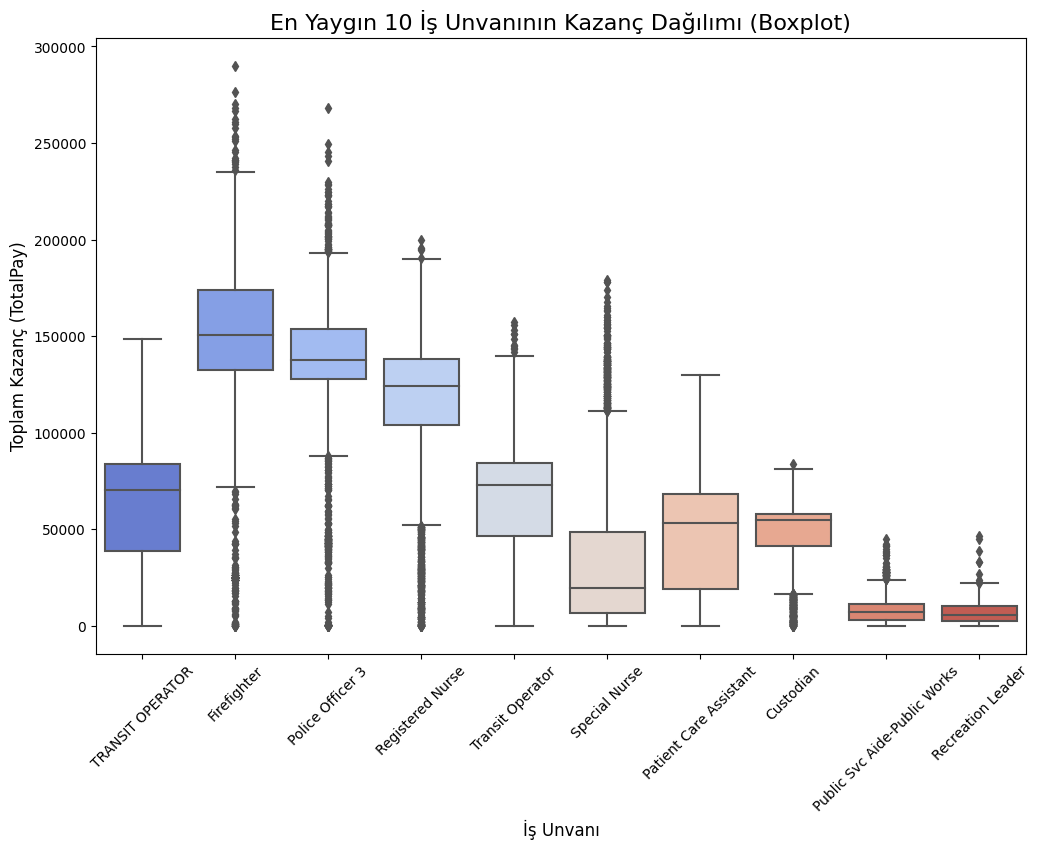

In [73]:
# En yaygın 10 iş unvanını seç
top_10_jobs = salary['JobTitle'].value_counts().head(10).index

# Veri kümesini filtrele
top_10_salary = salary[salary['JobTitle'].isin(top_10_jobs)]

# Boxplot oluştur
plt.figure(figsize=(12, 8))
sns.boxplot(data=top_10_salary, x='JobTitle', y='TotalPay', palette='coolwarm')
plt.title('En Yaygın 10 İş Unvanının Kazanç Dağılımı (Boxplot)', fontsize=16)
plt.xlabel('İş Unvanı', fontsize=12)
plt.ylabel('Toplam Kazanç (TotalPay)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


****Bu Boxplot grafiğinde, her bir iş unvanının maaş dağılımını gösterirken, kutunun ortasındaki yatay çizgi medyanı, kutunun üst ve alt sınırları çeyrekler arası aralığı (IQR), dışındaki noktalar ise aykırı değerleri temsil eder.****

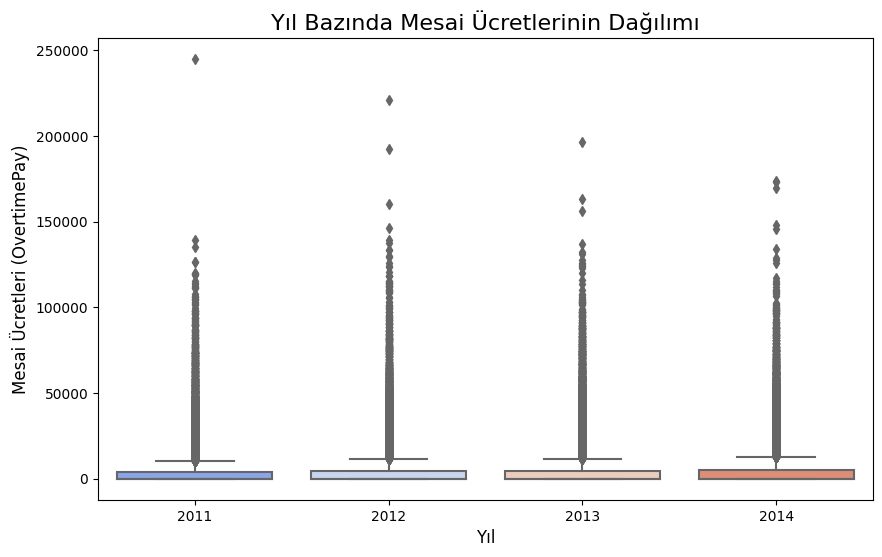

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary, x='Year', y='OvertimePay', palette='coolwarm')
plt.title('Yıl Bazında Mesai Ücretlerinin Dağılımı', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Mesai Ücretleri (OvertimePay)', fontsize=12)
plt.show()


****Bu Boxplot grafiğinde ise yıllara bazlı mesai ücretlerini gösteriyor. 2011 yılında görüldüğü üzere aykırı değer diğer yıllara göre daha uç seviyede.****

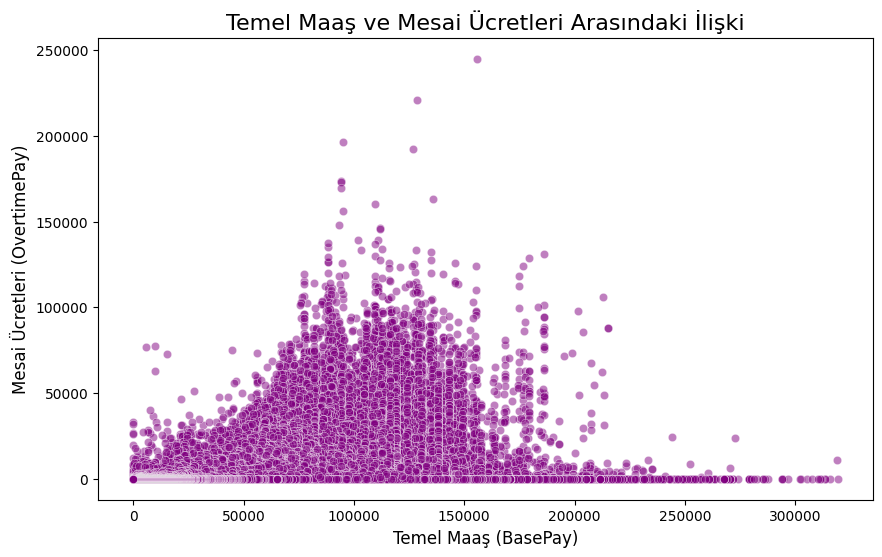

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary, x='BasePay', y='OvertimePay', alpha=0.5, color='purple')
plt.title('Temel Maaş ve Mesai Ücretleri Arasındaki İlişki', fontsize=16)
plt.xlabel('Temel Maaş (BasePay)', fontsize=12)
plt.ylabel('Mesai Ücretleri (OvertimePay)', fontsize=12)
plt.show()


****Temel Maaşın yaklaşık olarak 150.000'e kadar Mesai ücretiyle doğru orantılı olarak arttığını söyleyebiliriz. Bu bağlamda düşük maaşlı ve orta düzey maaşlı çalışanlar, genellikle mesaiye daha fazla katıldığını söyleyebiliriz. Bu nedenle, temel maaşları arttıkça mesai ücretleri de artıyor.****

****150.000 'den sonraki düşüşe de o maaşı alan kişilerin mesaiye fazla ihtiyacı olmadığından veyahut mesai yapsalar dahi ek bir ücret almama ihtimallerinden dolayı orantılı olarak maaş arttıkça mesai ücreti azalıyor diyebiliriz.****

Korelasyon Matrisi:
             TotalPay  OvertimePay
TotalPay      1.00000      0.50486
OvertimePay   0.50486      1.00000


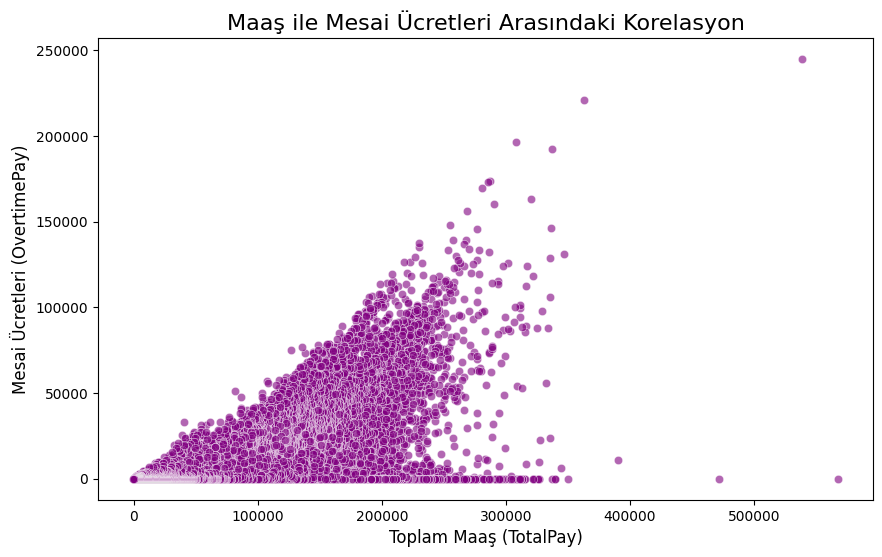

In [76]:
# Maaş ile mesai ücretleri arasındaki korelasyonu inceleyelim
correlation = salary[['TotalPay', 'OvertimePay']].corr()
print(f"Korelasyon Matrisi:\n{correlation}")

# Scatter plot ile ilişkiyi görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary, x='TotalPay', y='OvertimePay', alpha=0.6, color='purple')
plt.title('Maaş ile Mesai Ücretleri Arasındaki Korelasyon', fontsize=16)
plt.xlabel('Toplam Maaş (TotalPay)', fontsize=12)
plt.ylabel('Mesai Ücretleri (OvertimePay)', fontsize=12)
plt.show()


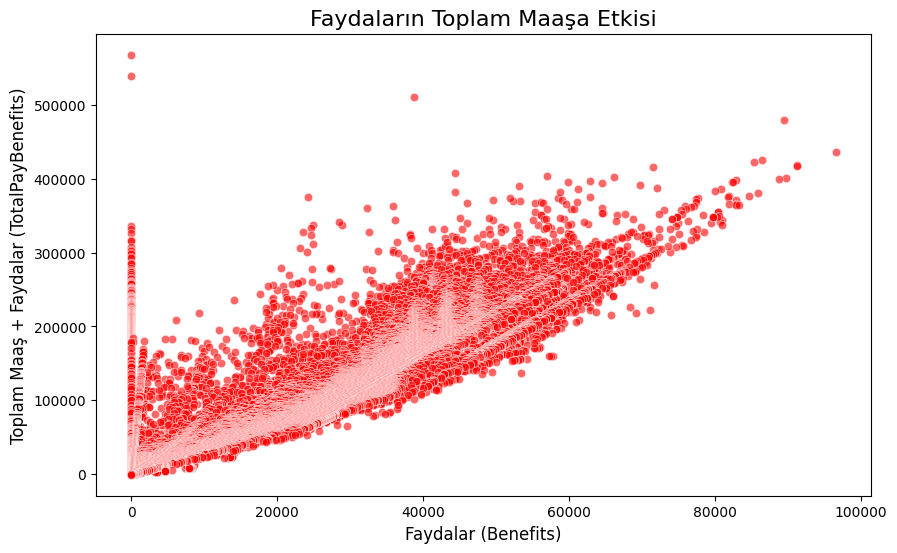

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=salary, x='Benefits', y='TotalPayBenefits', alpha=0.6, color='red')
plt.title('Faydaların Toplam Maaşa Etkisi', fontsize=16)
plt.xlabel('Faydalar (Benefits)', fontsize=12)
plt.ylabel('Toplam Maaş + Faydalar (TotalPayBenefits)', fontsize=12)
plt.show()


****Bu grafikten yola çıkarak faydaların Toplam Maaş ile pozitif bir ilişkisi olduğunu söyleyebiliriz.****

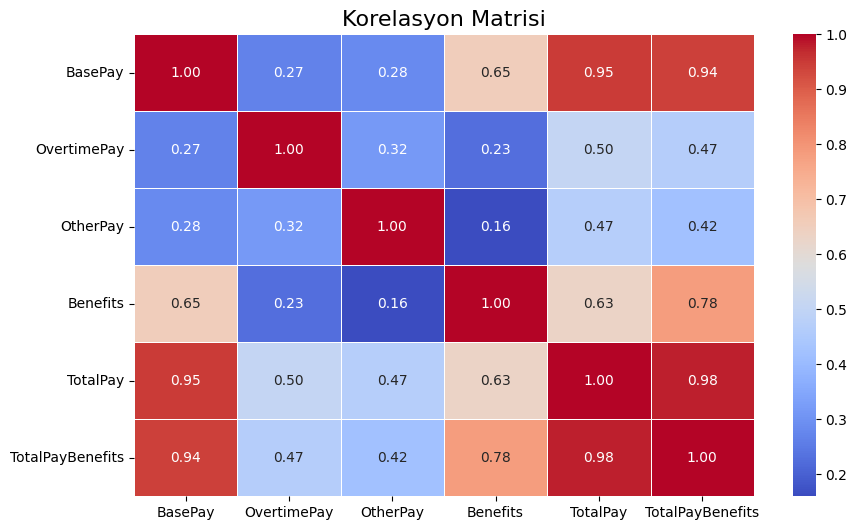

In [78]:
# Sayısal sütunlar arasındaki korelasyon matrisini gösterme
corr_matrix = salary[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()


****Korelasyon matrisi incelendiğinde matris içersindeki değer 1'e yakınsa pozitif korelasyon 0'a yakınsa o iki değişken arasında bir ilişki olmadığını söyleyebiliriz.****

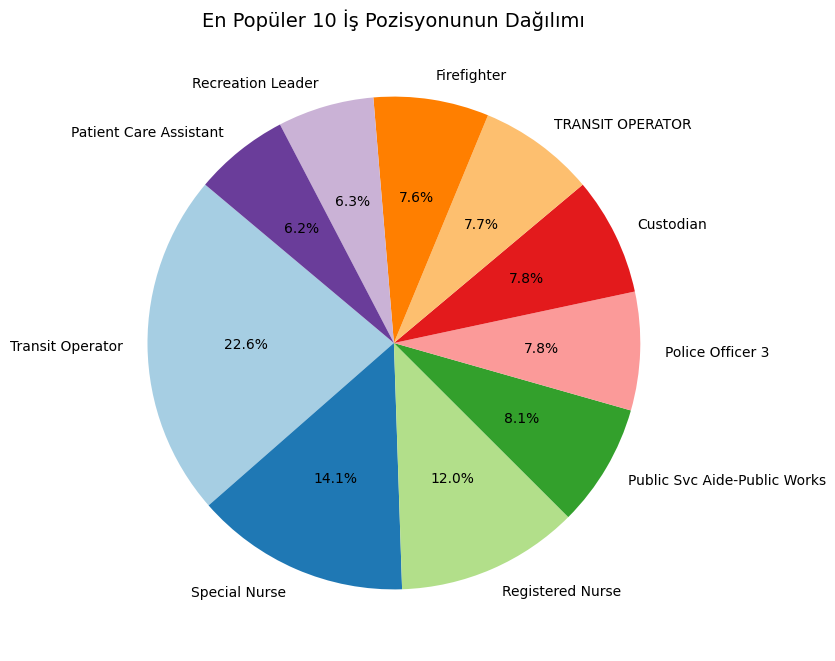

In [79]:
# En fazla çalışanı olan 10 iş pozisyonunu seçelim
top_jobs = salary['JobTitle'].value_counts().head(10)

# Pasta grafiği oluşturma
plt.figure(figsize=(8, 8))
plt.pie(top_jobs, labels=top_jobs.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

plt.title('En Popüler 10 İş Pozisyonunun Dağılımı', fontsize=14)
plt.show()


****Bu pasta grafiğinde ise en yaygın olan 10 iş pozisyonunun bir pasta grafiği üzerinde yüzdesel dağılımını görmekteyiz.****

# Stratejik Çıkarımlar ve Öneriler

****Problemin Tanımı ve Kullanım Alanları****
Projemizde maaş verisi kullanıldığı için, bu tür bir analiz insan kaynakları (HR) departmanlarının ve organizasyonların stratejik karar alma süreçlerine fayda sağlayabilir. Bu bağlamda çıkarımlar ve öneriler:
1-İş Unvanı ve Maaş Politikaları: Maaşların iş unvanlarına ve yıllara göre dağılımını analiz ederek adil maaş politikaları geliştirilebilir. Örneğin, bir sektördeki rekabetçi maaş aralıkları belirlenebilir.
2-Personel Yönetimi: Çalışanların toplam kazançlarını optimize etmek ve onları elde tutmak için maaş ve yan hakların yetersiz olduğu alanlar tespit edilebilir.
3-Performans ve Harcama Planları: Mesai ücretlerinin analizi, şirketin maliyet planlamasını ve verimlilik analizini destekler.

****Önerilen Model ve Algoritma****
Regresyon Modelleri: Maaş tahmini için Lineer Regresyon, Random Forest Regressor, veya Gradient Boosting Regressor gibi algoritmalar tercih edilebilir. Bu modeller, maaş verisinin sürekli bir hedef değişken olmasından dolayı uygundur.
Klasifikasyon Modelleri: İş unvanlarına göre maaş aralığını kategorize etmek için Decision Tree Classifier veya Logistic Regression kullanılabilir.
Veri Analitiği: Keşifsel veri analizi (EDA) için kullanılan histogramlar, korelasyon matrisleri, boxplotlar ile karar vericilere etkili raporlar sunulabilir.

****İş Hayatında Uygulanabilirlik****
Stratejik Maaş Planlaması: Şirket, gelecekteki maaş artışlarını ve bütçe tahminlerini daha iyi planlayabilir.
Personel İlgisi ve Motivasyon: Çalışanların performansını artırmak için adil maaş politikaları geliştirilir.
Tahmin ve Otomasyon: Geçmiş maaş verilerine dayanarak, yeni pozisyonlar için doğru maaş önerileri sunulabilir.